# Dataset Exploration
In this notebook, we will explore the VOC Detection dataset. This dataset is commonly used for object detection tasks and contains images with annotated objects.

In [1]:
from collections import Counter
import random

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision import datasets, utils
from torchvision.transforms import v2

from detection_tools.data.pascal_voc import CLASSES, tensorize_target

## Loading the dataset
First we will load the VOC Detection dataset using torchvision with appropriate transformations.



In [2]:
transform = v2.Compose([
    v2.ToImage(),
    # v2.ToDtype(torch.float32)
])
ds = datasets.VOCDetection(
    root="../data/Pascal_VOC_Detection",
    transform=transform,
    target_transform=tensorize_target
)

In [3]:
ds[0]

(Image([[[255, 255, 255,  ..., 202, 203, 204],
         [255, 255, 255,  ..., 203, 203, 202],
         [255, 255, 255,  ..., 206, 205, 205],
         ...,
         [205, 194, 206,  ..., 137, 120, 119],
         [192, 193, 193,  ..., 111, 108, 122],
         [178, 180, 185,  ...,  82,  73,  80]],
 
        [[255, 255, 255,  ..., 205, 206, 207],
         [255, 255, 255,  ..., 206, 206, 205],
         [255, 255, 255,  ..., 209, 208, 208],
         ...,
         [191, 180, 192,  ..., 128, 112, 113],
         [178, 179, 179,  ..., 106, 103, 119],
         [164, 166, 171,  ...,  77,  68,  77]],
 
        [[255, 255, 255,  ..., 248, 249, 250],
         [255, 255, 255,  ..., 249, 249, 248],
         [255, 255, 255,  ..., 252, 251, 251],
         ...,
         [178, 167, 179,  ..., 119, 101, 101],
         [165, 166, 166,  ..., 100,  97, 110],
         [151, 153, 158,  ...,  73,  64,  70]]], dtype=torch.uint8, ),
 (tensor([12, 14]),
  BoundingBoxes([[ 53.,  87., 471., 420.],
                 [1

In [4]:
print(f"Total number of images: {len(ds)}")

Total number of images: 5717


## Visualizing objects
Now, we will visualize some images from the dataset along with their bounding boxes and labels.

In [5]:
def plot_boxes(image, target, axis=None):
    if axis is None:
        axis = plt.gca()
    labels, boxes = target
    names = [CLASSES[i] for i in labels]
    bbox_image = utils.draw_bounding_boxes(
        image, boxes, names,
        width=2
    )
    axis.imshow(bbox_image.permute(1, 2, 0))

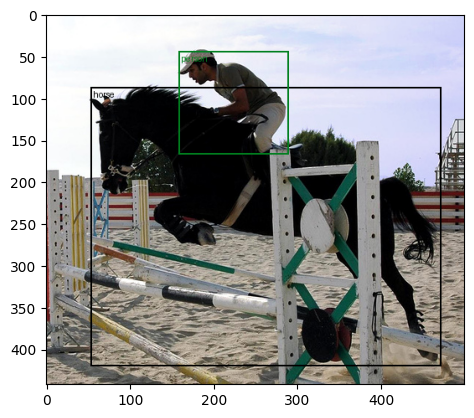

In [6]:
image, target = ds[0]
plot_boxes(image, target)

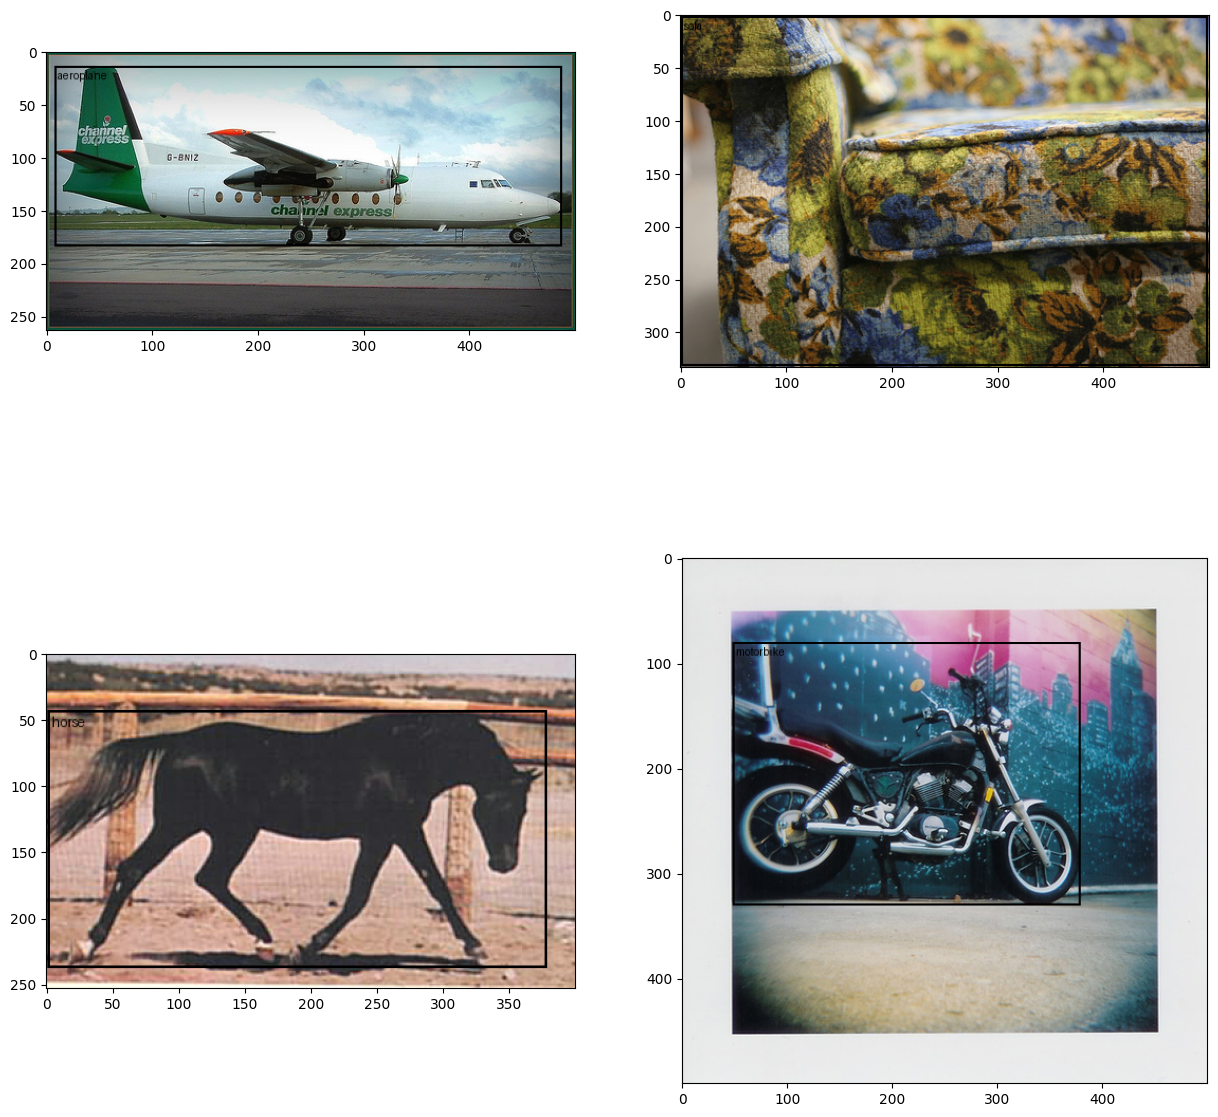

In [7]:
sample_ids = random.choices(range(len(ds)), k=4)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, ax in zip(sample_ids, axes.flatten()):
    img, target = ds[i]
    plot_boxes(img, target, axis=ax)

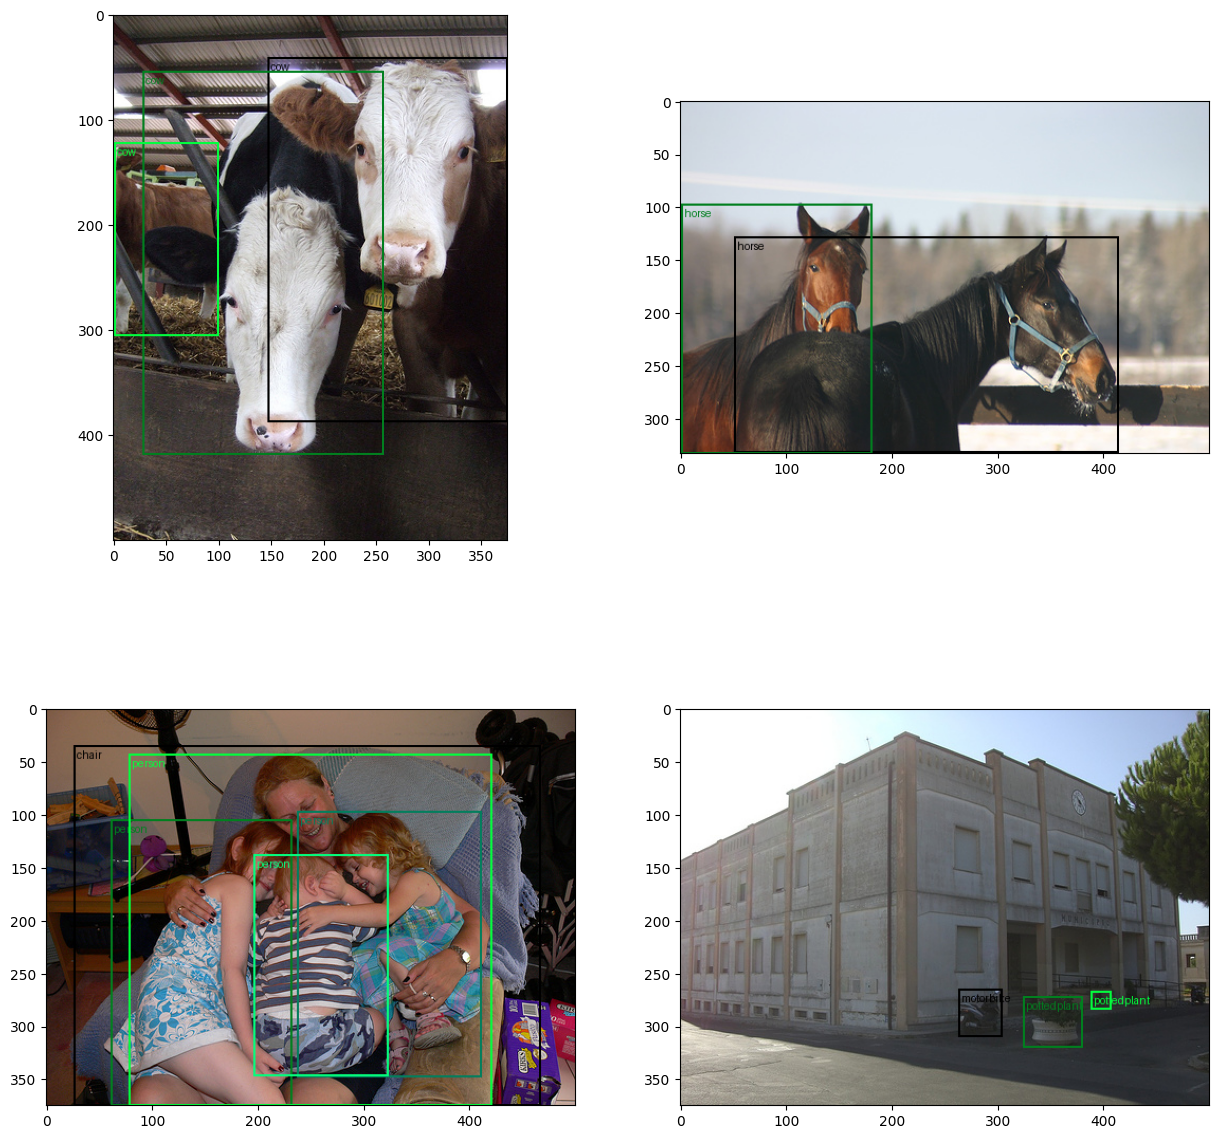

In [8]:
sample_ids = random.choices(range(len(ds)), k=4)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, ax in zip(sample_ids, axes.flatten()):
    img, target = ds[i]
    plot_boxes(img, target, axis=ax)

## Getting the Distribution
Now we are going to see the object distribution from all the images

In [9]:
classes = []
for _, target in ds:
    classes.extend(target[0].tolist())

Text(0.5, 1.0, 'Class Frequencies')

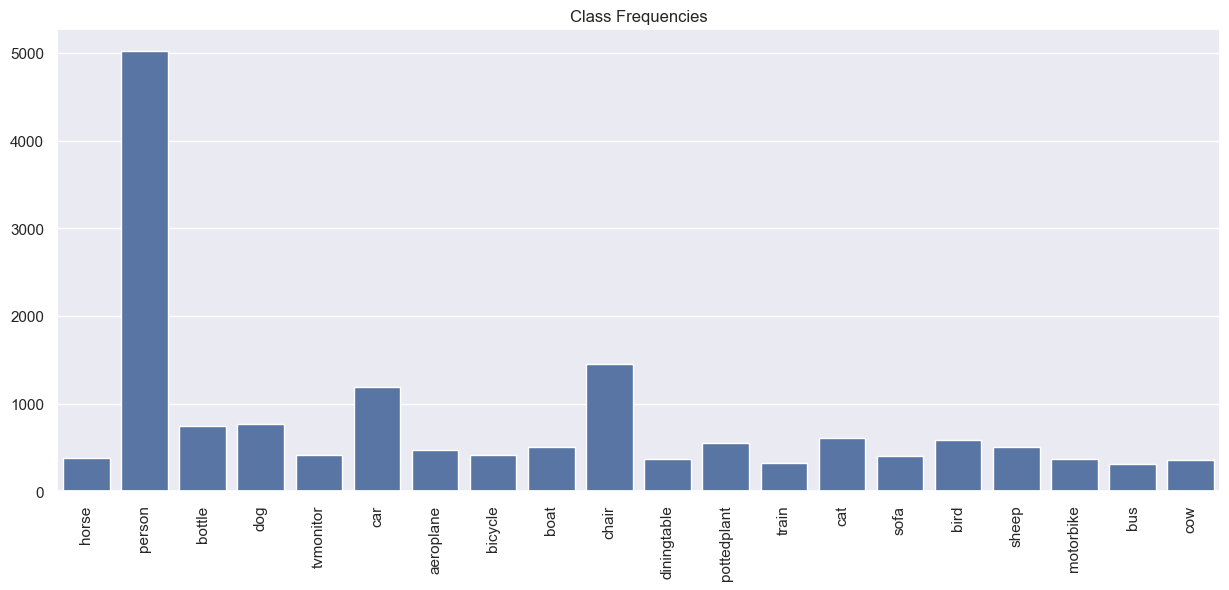

In [10]:
class_dist = Counter([CLASSES[i] for i in classes])
sns.set_theme()
plt.figure(figsize=(15, 6))
sns.barplot(class_dist)
plt.xticks(rotation=90)
plt.title("Class Frequencies")